# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "D:\Data s\pj6_data\data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


Выведем основные статистические характеристики для числовых признаков, таких как "Quantity" и "UnitPrice", чтобы посмотреть на их диапазоны значений.

In [4]:
print(data.describe())


            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


Обратим внимание, что у признаков "Quantity" и "UnitPrice" есть отрицательные значения, что может свидетельствовать о возвратах или отмененных транзакциях. Также есть значения, которые выглядят аномально большими, такие как максимальные значения для "Quantity" и "UnitPrice". Возможно, это тоже связано с ошибками или аномалиями в данных.

Посчитаем количество уникальных идентификаторов клиентов в столбце "CustomerID", чтобы узнать, сколько уникальных клиентов совершали транзакции в указанный период.

In [5]:
unique_customers = data['CustomerID'].nunique()
print("Количество уникальных клиентов:", unique_customers)


Количество уникальных клиентов: 4372


Выведем список уникальных стран из столбца "Country" для определения, из каких стран были сделаны транзакции.

In [6]:
countries = data['Country'].unique()
print("Страны, из которых совершались транзакции:\n", countries)


Страны, из которых совершались транзакции:
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


Проверим наличие пропусков в данных:

In [7]:
print("Количество пропущенных значений по столбцам:\n", data.isnull().sum())


Количество пропущенных значений по столбцам:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Проверим наличие дубликатов в данных:

In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


 Теперь мы знаем, с каким временным периодом мы работаем. Это полезная информация, которая может быть использована в разведывательном анализе данных, а также в планировании стратегий для бизнеса.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [9]:
# Просмотр распределения пропусков в столбцах Description и CustomerID
missing_values = data[['Description', 'CustomerID']].isnull().sum()
print("Распределение пропусков:")
print(missing_values)

Распределение пропусков:
Description      1454
CustomerID     135080
dtype: int64


In [10]:
# Удаление строк с пропущенными значениями в столбце CustomerID
data_cleaned = data.dropna(subset=['CustomerID'])

# Проверка размера DataFrame после удаления строк
print("Размер данных после удаления строк с пропущенными значениями в столбце CustomerID:", data_cleaned.shape)

Размер данных после удаления строк с пропущенными значениями в столбце CustomerID: (406829, 8)


In [11]:
# Проверка распределения пропусков после удаления
missing_values_after = data_cleaned[['Description', 'CustomerID']].isnull().sum()
print("Распределение пропусков после удаления строк с пропущенными значениями в столбце CustomerID:")
print(missing_values_after)

Распределение пропусков после удаления строк с пропущенными значениями в столбце CustomerID:
Description    0
CustomerID     0
dtype: int64


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [12]:
# Проверка наличия дубликатов в очищенных данных
duplicates_count_cleaned = data_cleaned.duplicated().sum()
print("Количество дубликатов в очищенных данных:", duplicates_count_cleaned)

# Удаление дубликатов из очищенных данных
data_cleaned = data_cleaned.drop_duplicates()

# Проверка размера DataFrame после удаления дубликатов
print("Размер очищенных данных после удаления дубликатов:", data_cleaned.shape)

Количество дубликатов в очищенных данных: 5225
Размер очищенных данных после удаления дубликатов: (401604, 8)


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [13]:
temp = data_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создадим в наших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзакция-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled
data_cleaned['QuantityCanceled'] = get_quantity_canceled(data_cleaned)

In [15]:
data_cleaned['QuantityCanceled'].value_counts()


0.0        393085
1.0          2923
2.0          1115
3.0           484
12.0          461
            ...  
1930.0          1
121.0           1
85.0            1
34.0            1
80995.0         1
Name: QuantityCanceled, Length: 122, dtype: int64

Узнаем, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалим их из данных.

Когда мы разобрались с возвратами, удалим транзакции с отрицательным количеством товара — они нам больше не нужны.


In [16]:
# Подсчитываем количество транзакций без контрагентов
transactions_without_counterpart = data_cleaned[data_cleaned['Quantity'] > 0]['InvoiceNo'].nunique()

print("Количество транзакций без контрагентов:", transactions_without_counterpart)


Количество транзакций без контрагентов: 18536


In [17]:
# Подсчитываем общее количество уникальных транзакций в данных
total_transactions = data_cleaned['InvoiceNo'].nunique()
# Проверяем, если количество транзакций без контрагентов меньше определенного порога (например, менее 5% от общего числа транзакций)
if transactions_without_counterpart < 0.05 * total_transactions:
    # Фильтруем данные, оставляя только транзакции с контрагентами
    data_cleaned = data_cleaned[data_cleaned['Quantity'] > 0]

# Пересчитываем количество уникальных клиентов после удаления некорректных транзакций
unique_customers_after_cleanup = data_cleaned['CustomerID'].nunique()
print("Количество уникальных клиентов после удаления некорректных транзакций:", unique_customers_after_cleanup)

Количество уникальных клиентов после удаления некорректных транзакций: 4372


In [18]:
# Удаление транзакций с отрицательным количеством товара (возвратами)
data_cleaned = data_cleaned[data_cleaned['Quantity'] >= 0]
# Пересчитываем количество уникальных клиентов после удаления некорректных транзакций
unique_customers_after_cleanup = data_cleaned['CustomerID'].nunique()
print("Количество уникальных клиентов после удаления транзакций с возвратами:", unique_customers_after_cleanup)

Количество уникальных клиентов после удаления транзакций с возвратами: 4339


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдем такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалим все специальные транзакции из таблицы.

In [19]:
import re

# Находим коды товаров, начинающиеся с латинских букв
special_transactions = data_cleaned[data_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

# Удаляем специальные транзакции из таблицы
data_cleaned = data_cleaned[~data_cleaned['InvoiceNo'].isin(special_transactions['InvoiceNo'])]
unique_customers_after_cleanup = data_cleaned['CustomerID'].nunique()
print("Количество уникальных клиентов после удаления специальных транзакций:", unique_customers_after_cleanup)

Количество уникальных клиентов после удаления специальных транзакций: 4070


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [20]:
# Подсчет количества транзакций с нулевой ценой
zero_price_transactions_count = data_cleaned[data_cleaned['UnitPrice'] == 0].shape[0]

# Подсчет общего количества уникальных транзакций в данных
total_transactions = data_cleaned['InvoiceNo'].nunique()

# Проверяем, если количество транзакций с нулевой ценой меньше определенного порога (например, менее 1% от общего числа транзакций)
if zero_price_transactions_count < 0.01 * total_transactions:
    # Фильтруем данные, удаляя транзакции с нулевой ценой
    data_cleaned = data_cleaned[data_cleaned['UnitPrice'] != 0]
nique_customers_after_cleanup = data_cleaned['CustomerID'].nunique()
print("Количество уникальных клиентов после удаления транзакций с товарами без стоимости:", unique_customers_after_cleanup)

Количество уникальных клиентов после удаления транзакций с товарами без стоимости: 4070


#### 2.1.6. Общая стоимость товаров в транзакции

Добавим в наш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [21]:
# Рассчитываем общую цену для каждой транзакции
data_cleaned['TotalPrice'] = data_cleaned['UnitPrice'] * (data_cleaned['Quantity'] - data_cleaned['QuantityCanceled'])


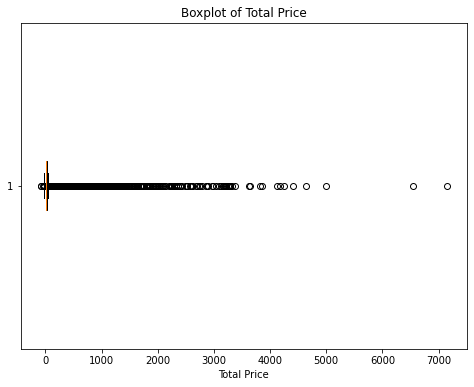

In [22]:
# Построение boxplot для признака 'TotalPrice'
plt.figure(figsize=(8, 6))
plt.boxplot(data_cleaned['TotalPrice'], vert=False)
plt.xlabel('Total Price')
plt.title('Boxplot of Total Price')
plt.show()


 по оси X у нас значение признака 'TotalPrice', а по оси Y располагаются значения этого признака для каждой транзакции.

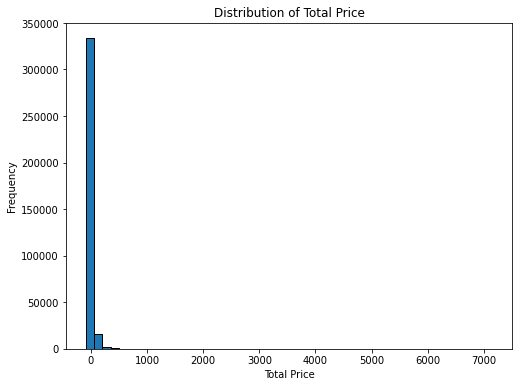

In [23]:
# Построение гистограммы для признака 'TotalPrice'
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['TotalPrice'], bins=50)
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Price')
plt.show()

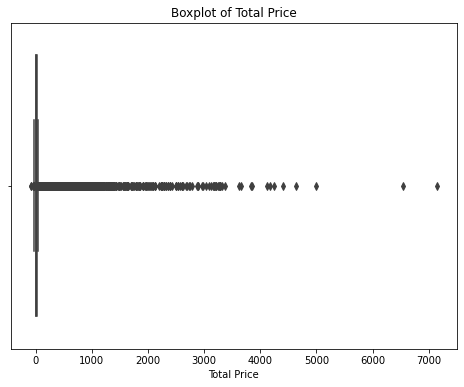

In [24]:
# Построение ящика с усами для признака 'TotalPrice'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['TotalPrice'])
plt.xlabel('Total Price')
plt.title('Boxplot of Total Price')
plt.show()

Сохраним результат очищения данных в отдельный файл, чтобы впоследствии нам не приходилось повторять эти действия.


In [25]:
# Сохранение результата очистки данных в отдельный файл
data_cleaned.to_csv('cleaned_data.csv', index=False)


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_cleaned['Country_Code'] = label_encoder.fit_transform(data_cleaned['Country'])


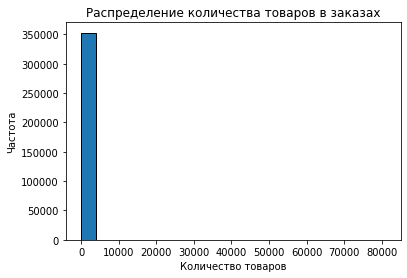

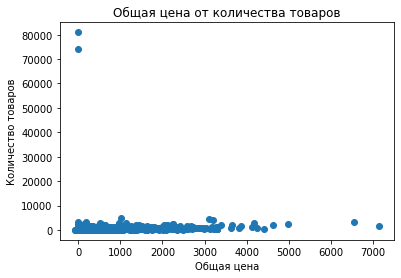

In [27]:
# Гистограмма количества товаров в заказах
plt.hist(data_cleaned['Quantity'], bins=20)
plt.xlabel('Количество товаров')
plt.ylabel('Частота')
plt.title('Распределение количества товаров в заказах')
plt.show()

# Диаграмма рассеивания между общей ценой и количеством товаров
plt.scatter(data_cleaned['TotalPrice'], data_cleaned['Quantity'])
plt.xlabel('Общая цена')
plt.ylabel('Количество товаров')
plt.title('Общая цена от количества товаров')
plt.show()

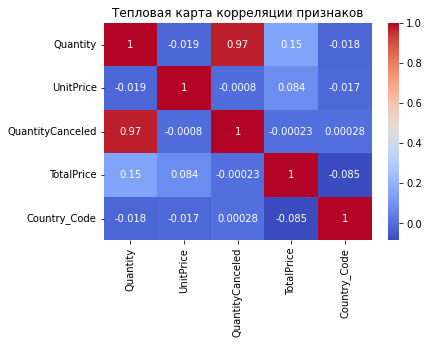

In [28]:
import seaborn as sns
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков')
plt.show()


### 2.2. Разведывательный анализ

После предобработки исходных данных произведем разведывательный анализ и исследуем транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 


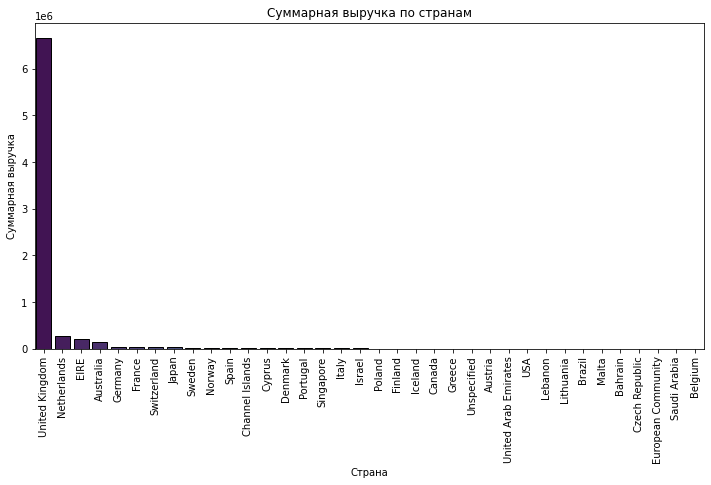

In [29]:
#График суммарной выручки по странам:
country_revenue = data_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.index, y=country_revenue.values, palette='viridis')
plt.xlabel('Страна')
plt.ylabel('Суммарная выручка')
plt.title('Суммарная выручка по странам')
plt.xticks(rotation=90)
plt.show()


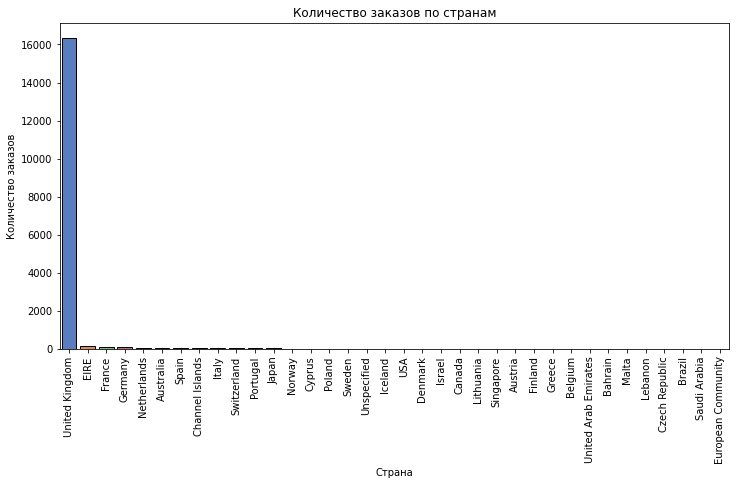

In [30]:
#График количества заказов по странам:
country_orders = data_cleaned.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_orders.index, y=country_orders.values, palette='muted')
plt.xlabel('Страна')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по странам')
plt.xticks(rotation=90)
plt.show()


Вывод:Лидер по количеству заказов, а также по сумарной выручке - United Kingdom

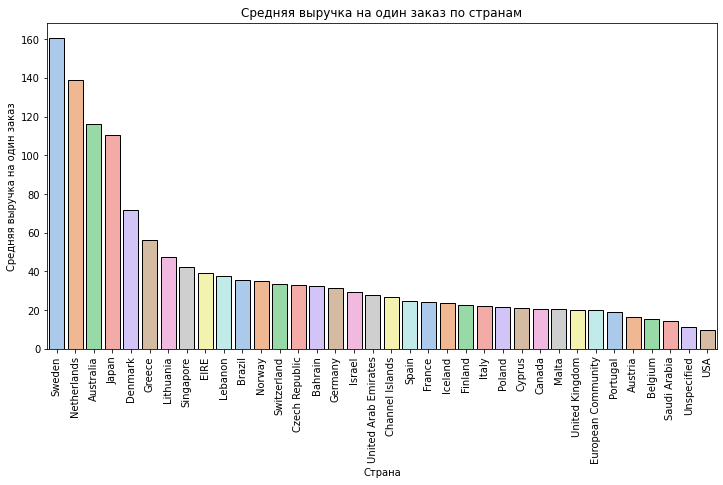

In [31]:
#График средней выручки на один заказ по странам:
average_revenue_per_order = data_cleaned.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_revenue_per_order.index, y=average_revenue_per_order.values, palette='pastel')
plt.xlabel('Страна')
plt.ylabel('Средняя выручка на один заказ')
plt.title('Средняя выручка на один заказ по странам')
plt.xticks(rotation=90)
plt.show()



Вывод: Cредняя выручка за один заказ выше в Швеции, это может указывать на несколько возможных факторов:

Большое количество крупных заказов: В стране могут быть клиенты, которые делают крупные заказы с большим количеством товаров или дорогих товаров, что приводит к высокой средней выручке на один заказ.

Высокие цены: Если в стране продаются дорогие товары или цены на товары выше, чем в других странах, то средняя выручка за один заказ может быть выше.

Повышенный интерес к более дорогим товарам: Возможно, в данной стране клиенты предпочитают покупать более дорогие товары, что приводит к более высокой средней выручке на один заказ.

Отсутствие возвратов: Если в данной стране мало возвратов или клиенты редко отменяют заказы, то это может повысить среднюю выручку за один заказ.

In [32]:
# Добавим столбец с информацией о сезоне на основе даты транзакции
data_cleaned['Season'] = data_cleaned['InvoiceDate'].dt.month.apply(lambda x: 'Зима' if x in [1, 2, 12] else 'Весна' if x in [3, 4, 5] else 'Лето' if x in [6, 7, 8] else 'Осень')

#Сгруппируем данные по странам и сезонам и рассчитать суммарную выручку для каждой группы
seasonal_revenue = data_cleaned.groupby(['Country', 'Season'])['TotalPrice'].sum().reset_index()

#Определим страны с наибольшей сезонной выручкой
max_revenue_countries = seasonal_revenue.groupby('Country')['TotalPrice'].sum().nlargest(5)

print(max_revenue_countries)


Country
United Kingdom    6653471.24
Netherlands        270947.30
EIRE               212841.38
Australia          136950.25
Germany             49136.56
Name: TotalPrice, dtype: float64


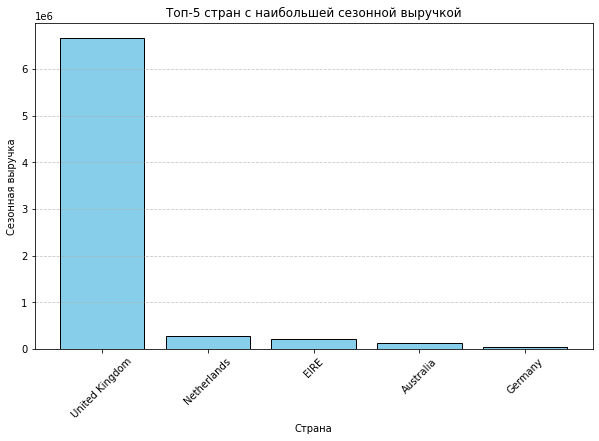

In [33]:
# Создадим отдельные столбцы для стран и выручки
countries = max_revenue_countries.index
revenue = max_revenue_countries.values

# Построим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(countries, revenue, color='skyblue')
plt.xlabel('Страна')
plt.ylabel('Сезонная выручка')
plt.title('Топ-5 стран с наибольшей сезонной выручкой')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

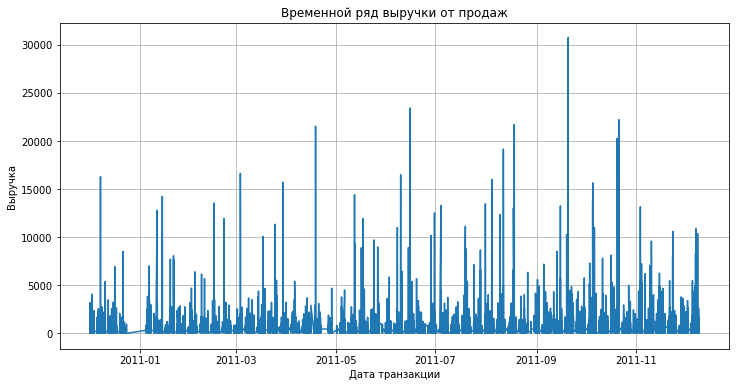

In [34]:
# Создадим временной ряд на основе даты транзакции и общей выручки
time_series = data_cleaned.groupby('InvoiceDate')['TotalPrice'].sum()

# Визуализируем временной ряд
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values)
plt.xlabel('Дата транзакции')
plt.ylabel('Выручка')
plt.title('Временной ряд выручки от продаж')
plt.grid(True)
plt.show()

In [35]:
# Сгруппируем данные по датам и часам совершения транзакции и найдем количество заказов на каждый день-час
data_cleaned['DateHour'] = data_cleaned['InvoiceDate'].dt.to_period('H')
orders_per_datehour = data_cleaned.groupby('DateHour')['InvoiceNo'].nunique()

# Найдем среднее количество ежедневно поступающих заказов в каждый из часов
average_orders_per_hour = orders_per_datehour.groupby(orders_per_datehour.index.hour).mean()

print(average_orders_per_hour)

DateHour
6     1.000000
7     1.315789
8     2.523077
9     4.992032
10    6.643564
11    6.980263
12    9.578947
13    8.026490
14    6.963087
15    6.202658
16    3.866412
17    2.804469
18    3.511111
19    2.857143
20    1.214286
Name: InvoiceNo, dtype: float64


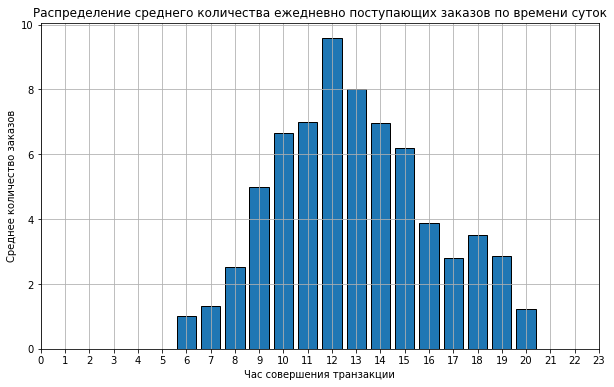

In [36]:
# Визуализируем распределение среднего количества ежедневно поступающих заказов по времени суток
plt.figure(figsize=(10, 6))
plt.bar(average_orders_per_hour.index, average_orders_per_hour.values)
plt.xlabel('Час совершения транзакции')
plt.ylabel('Среднее количество заказов')
plt.title('Распределение среднего количества ежедневно поступающих заказов по времени суток')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Проанализируем отток клиентов, которые перестали совершать покупки в течение определенного периода

In [37]:
# Найдем дату последней покупки для каждого клиента
last_purchase_date = data_cleaned.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Определим текущую дату (можно взять максимальную дату из данных)
current_date = data_cleaned['InvoiceDate'].max()

# Определим период неактивности, например, 90 дней
inactive_period = pd.Timedelta(days=90)

# Определим клиентов, у которых последняя покупка была более 90 дней назад
churned_customers = last_purchase_date[last_purchase_date['InvoiceDate'] < current_date - inactive_period]

# Объединим информацию об оттоке с основными данными клиентов
churned_data = data_cleaned.merge(churned_customers, on='CustomerID', how='inner')

# Выведем информацию о причинах оттока, например, коды товаров или описания покупок
print(churned_data[['CustomerID', 'InvoiceDate_x', 'StockCode', 'Description']])


      CustomerID       InvoiceDate_x StockCode  \
0          17850 2010-12-01 08:26:00    85123A   
1          17850 2010-12-01 08:26:00     71053   
2          17850 2010-12-01 08:26:00    84406B   
3          17850 2010-12-01 08:26:00    84029G   
4          17850 2010-12-01 08:26:00    84029E   
...          ...                 ...       ...   
46006      15652 2011-09-09 14:22:00     23298   
46007      15652 2011-09-09 14:22:00     47566   
46008      15652 2011-09-09 14:22:00     48194   
46009      15652 2011-09-09 14:22:00     48187   
46010      15652 2011-09-09 14:22:00     22690   

                               Description  
0       WHITE HANGING HEART T-LIGHT HOLDER  
1                      WHITE METAL LANTERN  
2           CREAM CUPID HEARTS COAT HANGER  
3      KNITTED UNION FLAG HOT WATER BOTTLE  
4           RED WOOLLY HOTTIE WHITE HEART.  
...                                    ...  
46006                       SPOTTY BUNTING  
46007                        PARTY BUNT

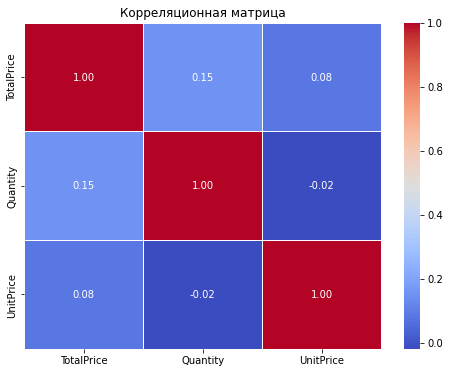

In [38]:
# Выбираем интересующие нас столбцы для анализа корреляции
columns_of_interest = ['TotalPrice', 'Quantity', 'UnitPrice']

# Создаем матрицу корреляций
correlation_matrix = data_cleaned[columns_of_interest].corr()

# Строим тепловую карту для визуализации корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()


In [39]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352801 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         352801 non-null  object        
 1   StockCode         352801 non-null  object        
 2   Description       352801 non-null  object        
 3   Quantity          352801 non-null  int64         
 4   InvoiceDate       352801 non-null  datetime64[ns]
 5   UnitPrice         352801 non-null  float64       
 6   CustomerID        352801 non-null  object        
 7   Country           352801 non-null  object        
 8   QuantityCanceled  352801 non-null  float64       
 9   TotalPrice        352801 non-null  float64       
 10  Country_Code      352801 non-null  int32         
 11  Season            352801 non-null  object        
 12  DateHour          352801 non-null  period[H]     
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), objec

In [40]:
df=data_cleaned.drop('QuantityCanceled',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352801 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     352801 non-null  object        
 1   StockCode     352801 non-null  object        
 2   Description   352801 non-null  object        
 3   Quantity      352801 non-null  int64         
 4   InvoiceDate   352801 non-null  datetime64[ns]
 5   UnitPrice     352801 non-null  float64       
 6   CustomerID    352801 non-null  object        
 7   Country       352801 non-null  object        
 8   TotalPrice    352801 non-null  float64       
 9   Country_Code  352801 non-null  int32         
 10  Season        352801 non-null  object        
 11  DateHour      352801 non-null  period[H]     
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6), period[H](1)
memory usage: 33.6+ MB


### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).



In [41]:
# Определим точку отсчета t_0
t_0 = pd.to_datetime('2011-12-10 00:00:00')

#  Рассчитаем Recency
df['Recency'] = (t_0 - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

#  Сгруппируем данные по CustomerID
rfm_table = df.groupby('CustomerID').agg({
    # Рассчитаем Frequency
    'InvoiceNo': pd.Series.nunique,
    # Рассчитаем Monetary Value
    'TotalPrice': 'sum',
    # Включим Recency в таблицу
    'Recency': 'first'
}).reset_index()

# Дадим столбцам результирующей таблицы соответствующие названия
rfm_table.columns = ['CustomerID', 'Frequency', 'MonetaryValue', 'Recency']

rfm_table


,CustomerID,Frequency,MonetaryValue,Recency
0,12346,1,0.00,325
1,12347,7,4310.00,2
2,12352,2,296.50,267
3,12353,1,89.00,204
4,12354,1,1079.40,232
...,...,...,...,...
4064,18280,1,180.60,277
4065,18281,1,80.82,180
4066,18282,2,176.60,7
4067,18283,14,1795.03,3


После того как мы подготовили RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). 

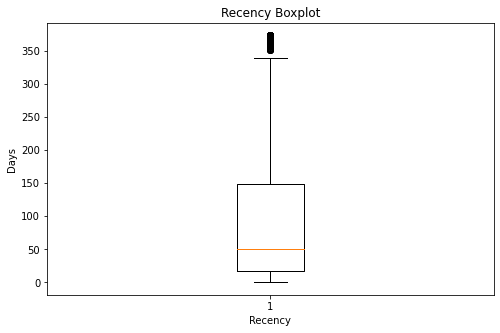

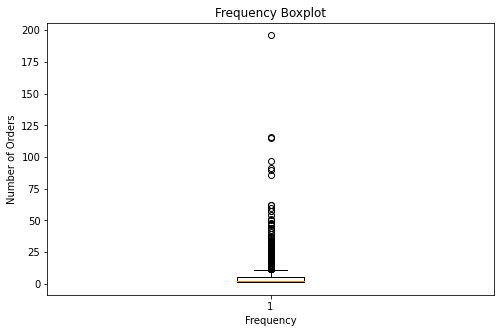

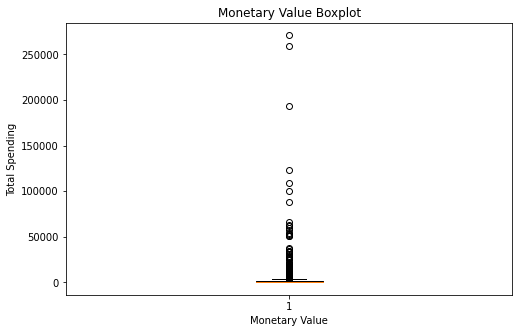

In [42]:
# Создадим коробчатую диаграмму для Recency
plt.figure(figsize=(8, 5))
plt.boxplot(rfm_table['Recency'])
plt.xlabel('Recency')
plt.ylabel('Days')
plt.title('Recency Boxplot')
plt.show()

# Создадим коробчатую диаграмму для Frequency
plt.figure(figsize=(8, 5))
plt.boxplot(rfm_table['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Number of Orders')
plt.title('Frequency Boxplot')
plt.show()

# Создадим коробчатую диаграмму для Monetary Value
plt.figure(figsize=(8, 5))
plt.boxplot(rfm_table['MonetaryValue'])
plt.xlabel('Monetary Value')
plt.ylabel('Total Spending')
plt.title('Monetary Value Boxplot')
plt.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [43]:
# Найдем 95-й процентиль для Frequency и MonetaryValue
freq_95_percentile = rfm_table['Frequency'].quantile(0.95)
monetary_95_percentile = rfm_table['MonetaryValue'].quantile(0.95)

# Отфильтруем данные и удалим клиентов с более высокими значениями Frequency и MonetaryValue
rfm_filtered = rfm_table[
    (rfm_table['Frequency'] <= freq_95_percentile) &
    (rfm_table['MonetaryValue'] <= monetary_95_percentile)
]

# Выведем результат
print(rfm_filtered)


     CustomerID  Frequency  MonetaryValue  Recency
0         12346          1           0.00      325
1         12347          7        4310.00        2
2         12352          2         296.50      267
3         12353          1          89.00      204
4         12354          1        1079.40      232
...         ...        ...            ...      ...
4063      18278          1         173.90       73
4064      18280          1         180.60      277
4065      18281          1          80.82      180
4066      18282          2         176.60        7
4068      18287          3        1837.28       42

[3798 rows x 4 columns]


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, мы можем уменьшить размерность исходных признаков до двух компонент.

 Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства обернем эти шаги по предобработке данных в pipeline.

Произведем предобработку исходных данных. На основе RFM-признаков кластеризуем клиентов онлайн-магазина подарков с помощью известных нам методов.

Подберем оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберем алгоритм с наибольшим коэффициентом силуэта, сделаем предсказание меток кластеров.


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Выбираем только RFM-характеристики для обработки
X = rfm_filtered[['Recency', 'Frequency', 'MonetaryValue']]

# Создаем pipeline для предобработки данных и уменьшения размерности
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('pca', PCA(n_components=2))   # Уменьшение размерности до двух компонент
])

# Применяем pipeline к данным
X_pca = preprocessing_pipeline.fit_transform(X)

#Кластеризация на основе RFM-характеристик

# Список алгоритмов для кластеризации
clustering_algorithms = [
    KMeans(),
    DBSCAN(),
    AgglomerativeClustering()
]

# Словарь для хранения результатов кластеризации и коэффициентов силуэта
results = {}

# Перебираем алгоритмы
for algorithm in clustering_algorithms:
    algorithm_name = algorithm.__class__.__name__
    results[algorithm_name] = {}
    for n_clusters in range(3, 11):
        # Применяем алгоритм к данным
        if algorithm_name == 'DBSCAN':
            algorithm.set_params(eps=0.5, min_samples=5)  # Установим параметры для DBSCAN
        else:
            algorithm.set_params(n_clusters=n_clusters)
        labels = algorithm.fit_predict(X_pca)
        # Вычисляем коэффициент силуэта
        silhouette_avg = silhouette_score(X_pca, labels)
        # Сохраняем результаты
        results[algorithm_name][n_clusters] = silhouette_avg

# Выбор алгоритма с наибольшим коэффициентом силуэта и предсказание меток кластеров

# Находим алгоритм с наибольшим коэффициентом силуэта и оптимальное количество кластеров
best_algorithm = max(results, key=lambda k: max(results[k].values()))
best_n_clusters = max(results[best_algorithm], key=results[best_algorithm].get)

# Применяем выбранный алгоритм с оптимальным количеством кластеров
best_clustering_algorithm = [algorithm for algorithm in clustering_algorithms if algorithm.__class__.__name__ == best_algorithm][0]
if best_algorithm != 'DBSCAN':
    best_clustering_algorithm.set_params(n_clusters=best_n_clusters)
else:
    best_clustering_algorithm.set_params(eps=0.5, min_samples=5)  # Установим параметры для DBSCAN
best_labels = best_clustering_algorithm.fit_predict(X_pca)

# Выводим результаты
print("Best Clustering Algorithm:", best_algorithm)
print("Best Number of Clusters:", best_n_clusters)
print("Predicted Labels:")
print(best_labels)


Best Clustering Algorithm: KMeans
Best Number of Clusters: 3
Predicted Labels:
[0 2 0 ... 0 1 1]


In [45]:
# Инициализируем KMeans с оптимальным числом кластеров (3)
kmeans = KMeans(n_clusters=3)

# Применяем KMeans к данным
labels = kmeans.fit_predict(X_pca)

# Добавляем метки кластеров обратно в исходную таблицу
rfm_filtered['Cluster'] = labels

# Выводим первые несколько строк с метками кластеров
print(rfm_filtered.head())


  CustomerID  Frequency  MonetaryValue  Recency  Cluster
0      12346          1            0.0      325        2
1      12347          7         4310.0        2        0
2      12352          2          296.5      267        2
3      12353          1           89.0      204        2
4      12354          1         1079.4      232        2


In [46]:
rfm_filtered['Cluster'].value_counts()

1    2109
2     980
0     709
Name: Cluster, dtype: int64

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируем результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируем полученную диаграмму и попробуйте понять, какие кластеры у нас получились.

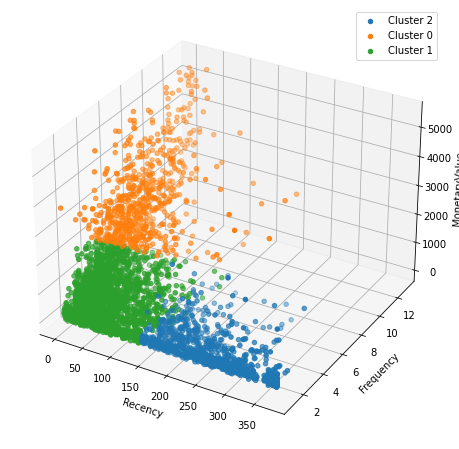

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем 3D-диаграмму
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализируем точки для каждого кластера
for cluster_label in rfm_filtered['Cluster'].unique():
    cluster_data = rfm_filtered[rfm_filtered['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['MonetaryValue'], label=f'Cluster {cluster_label}')

# Добавляем подписи осей и легенду
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
ax.legend()

# Показываем диаграмму
plt.show()


На диаграмме видно, что самый многочисленный кластер 0,это клиенты-новички и перспективные клиенты,кластер 2- клиенты , находящиеся в зоне риска,с которыми возможно нужно проводить компании по возвращению, кластер 1- лояльные, клиенты,которые чаще всех совершают более дорогостоящие покупки.

#### 3.2.2. Построение профиля кластеров

Далее составим так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [48]:
import pandas as pd
import plotly.graph_objects as go
from sklearn import preprocessing

def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data_normalized = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)

    # Создаём список признаков
    features = grouped_data.columns

    # Создаём пустую фигуру
    fig = go.Figure()

    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data_normalized.iloc[i].values,  # радиусы
            theta=features,  # название засечек
            fill='toself',  # заливка многоугольника цветом
            name=f'Cluster {i}',  # название — номер кластера
        ))

    # Обновляем параметры фигуры
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]  # диапазон значений по радиусу от 0 до 1 (нормализованные данные)
            )
        ),
        showlegend=True,  # отображение легенды
        autosize=False,  # устанавливаем свои размеры графика
        width=800,  # ширина (в пикселях)
        height=800,  # высота (в пикселях)
    )

    # Отображаем фигуру
    fig.show()

# Пример использования функции с нашими данными и рассчитанными профилями кластеров
# Здесь grouped_data - это таблица сгруппированных данных, а n_clusters - количество кластеров
plot_cluster_profile(rfm_filtered, 3)

## 5. Выводы и оформление работы

Заключение:

В данном проекте была проведена сегментация клиентов онлайн-магазина на основе RFM-характеристик (Recency, Frequency, MonetaryValue). Сначала была подготовлена и очищена исходная таблица данных. Затем была создана RFM-таблица, в которой рассчитаны агрегированные характеристики для каждого клиента. Далее была проведена кластеризация данных с использованием трех алгоритмов: KMeans, DBSCAN и Agglomerative Clustering.

После анализа результатов, было определено, что наилучшие результаты показал алгоритм KMeans с оптимальным числом кластеров равным 3. Были выделены следующие сегменты клиентов:

Кластер 0: Многочисленная группа клиентов-новичков и перспективных клиентов. Эта группа потенциально может развиваться и становиться более активной.

Кластер 2: Клиенты, которые находятся в зоне риска. Возможно, это клиенты, с которыми стоит проводить мероприятия по возвращению и увеличению активности.

Кластер 1: Лояльные клиенты, совершающие более дорогостоящие покупки. Это ценная группа, которую стоит стимулировать и удерживать.

Эта сегментация поможет магазину адаптировать маркетинговые стратегии для каждой группы клиентов и повысить эффективность взаимодействия с ними.